In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("netflix_titles.csv")

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [3]:
#1.data exploration
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
#2.data cleaning
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df[['director', 'cast', 'country', 'date_added']] = df[['director', 'cast', 'country', 'date_added']].fillna("Unknown")


In [8]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [12]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

In [13]:
#3.analysis
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [14]:
df['rating'].value_counts().head(10)

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64

In [15]:
df['release_year'].value_counts().head(10)

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64

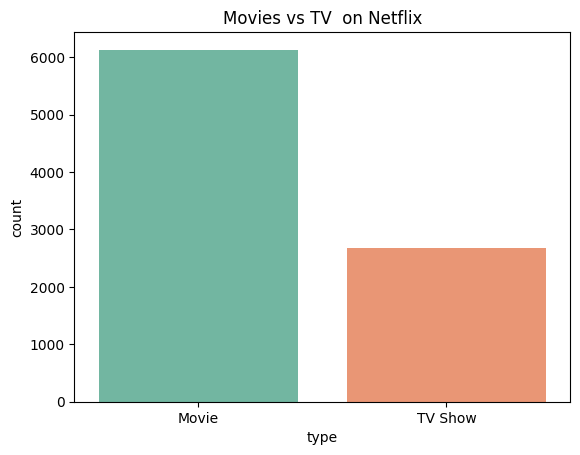

In [19]:
#4.visualization
sns.countplot(data=df, x='type', palette='Set2',hue='type')
plt.title("Movies vs TV  on Netflix")
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2896\643526728.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


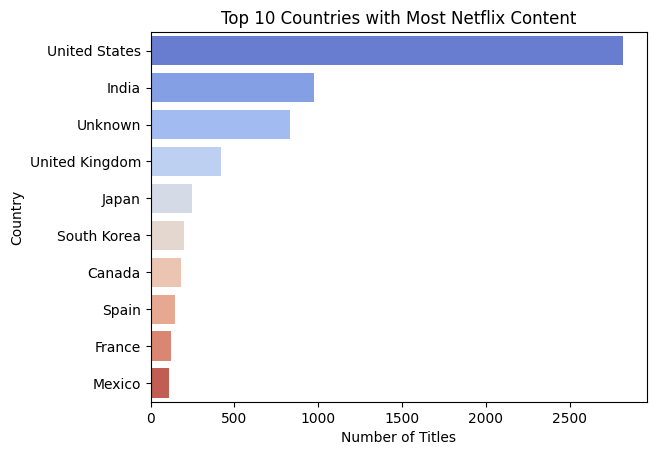

In [22]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

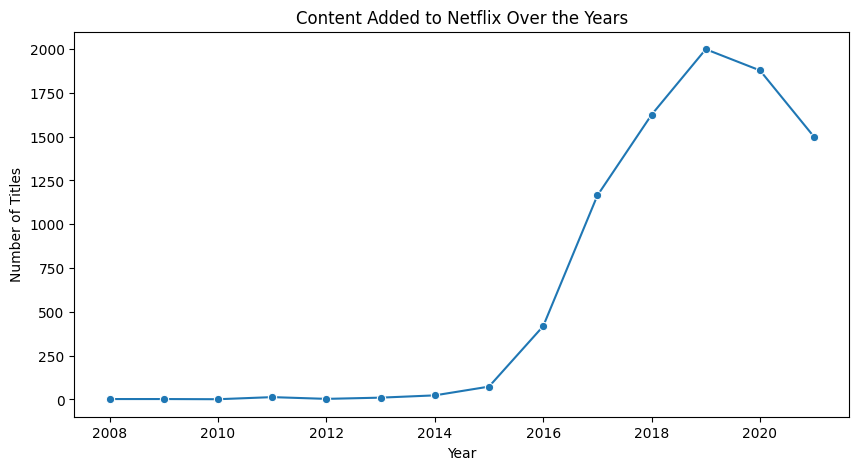

In [30]:
content_by_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=content_by_year.index, y=content_by_year.values, marker='o')
plt.title("Content Added to Netflix Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2896\4192383389.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="mako")


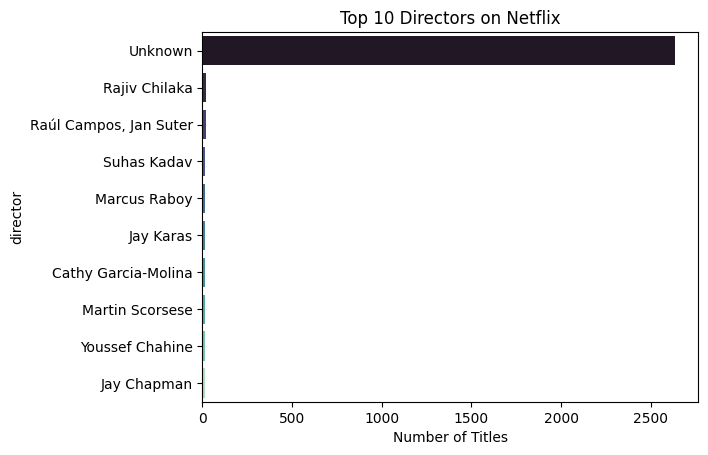

In [28]:
top_directors = df['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette="mako")
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Number of Titles")

plt.show()

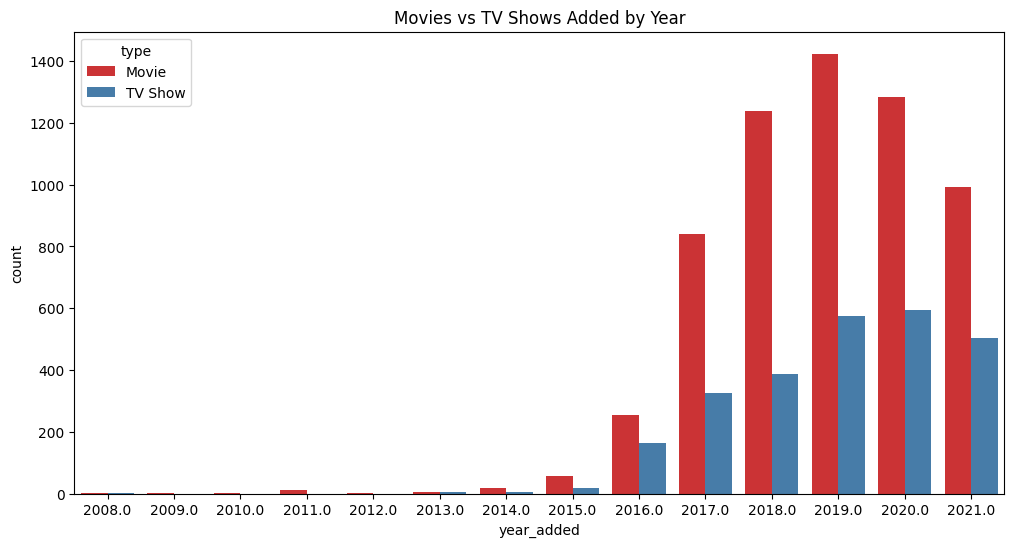

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='year_added', hue='type', palette='Set1')
plt.title("Movies vs TV Shows Added by Year")
plt.show()

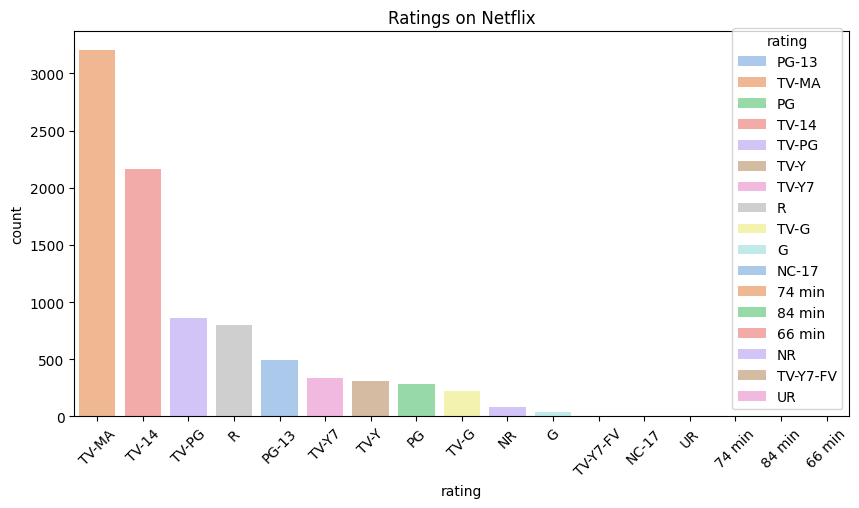

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette="pastel",hue='rating')
plt.title("Ratings on Netflix")
plt.xticks(rotation=45)
plt.show()

